In [1]:
#en esta parte de aqui se hace la importancia de las dependencias a utilizar para el procesamiento de dataset 
#las libreria pandas,matplotlib y pandas seran las que se vaya a utilizar las demas librerias seran para el uso de graficas para 
#sacar la correlacion 

import numpy as np 
import matplotlib.pyplot as plt

import pandas as pd       

import math
from scipy.stats import pearsonr

from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from math import e
from sklearn.linear_model import LogisticRegression
%matplotlib inline

import seaborn as sns

In [2]:
#hacemos uso de la libreria pandas para guardar en una variable el link al cual vamos haceder y tambien los limpiamos 
ruta = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

df = pd.read_csv(ruta, header=None)
df.head(10)
df.tail(3)

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
print("headers\n", headers)
df.columns = headers
df.head(3)

headers
 ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [3]:
#utilizamos la funcion describe() para que nos muestro todo el dataset 
df.describe()
df.describe(include = 'all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [4]:
#con la funcion corr podemos hacer correlacion de los datos y asi saber si tienen depedencia y son independientes
cordatos = df.corr()

In [6]:
#llamamos la correlacion para mostrar
cordatos

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.178515,-0.035823,0.034606
wheel-base,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.249786,-0.470414,-0.544082
length,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.158414,-0.670909,-0.704662
width,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.181129,-0.642704,-0.677218
height,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.261214,-0.048640,-0.107358
curb-weight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.151362,-0.757414,-0.797465
engine-size,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.028971,-0.653658,-0.677470
compression-ratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,1.000000,0.324701,0.265201
city-mpg,-0.035823,-0.470414,-0.670909,-0.642704,-0.048640,-0.757414,-0.653658,0.324701,1.000000,0.971337
highway-mpg,0.034606,-0.544082,-0.704662,-0.677218,-0.107358,-0.797465,-0.677470,0.265201,0.971337,1.000000


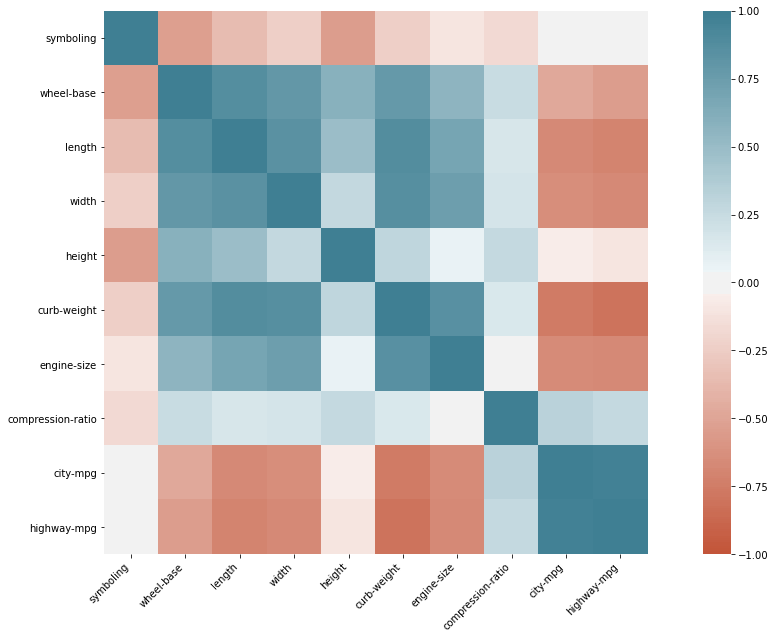

In [7]:
#realizamos una correlacion graficada en esta nos mostrara si existe correlacion en los datos al ver esta grafica podemos observar 
#que nos hay mucha correlacion ya que hay datos null o vacios que aparecen en NaN
plt.rcParams['figure.figsize'] = (20.0, 10.0)
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [9]:
#hacemos uso de la varible dummies para categorizar las columnas en mi caso las categorize por marca de autos
pd.get_dummies(df.make)

,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,...,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [1]:
from sklearn import preprocessing

In [6]:
#creamos una funcion para normalizar los datos para que nos muestre en ceros y unos 
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result